In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data\measurements.csv')
display(data)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [3]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [4]:
#columns specilas, refill liters and refill gas can be deleted because vitually all data is mssing and they add no value. 

drop_columns = data[['specials', 'refill liters', 'refill gas']]

data = data.drop(columns=drop_columns)

In [5]:
#now it is time to fill in the missing values for temp_inside

data['temp_inside'].value_counts()

21,5    133
22      102
22,5     59
20       25
21       13
23       13
25       12
24,5      7
20,5      4
24        3
23,5      2
25,5      2
19        1
Name: temp_inside, dtype: int64

In [6]:
#we can use knn-imputer to fill in the mssing values in temp_inside

In [7]:
numerical = data.select_dtypes(include='number')
categorical = data.select_dtypes(exclude='number')
numerical.head()


,speed,temp_outside,AC,rain,sun
0,26,12,0,0,0
1,30,13,0,0,0
2,38,15,0,0,0
3,36,14,0,0,0
4,46,15,0,0,0


In [8]:
categorical.head()

,distance,consume,temp_inside,gas_type
0,28,5,"21,5",E10
1,12,"4,2","21,5",E10
2,"11,2","5,5","21,5",E10
3,"12,9","3,9","21,5",E10
4,"18,5","4,5","21,5",E10


In [9]:
#these are not categorical, only gas_type is. Let's turn them into numerical.
num = categorical.drop(['gas_type'], axis = 1)

In [10]:
num = num.apply(lambda x: x.str.replace(',','.'))

In [11]:
num = num.astype('float')

In [12]:
num.head()

,distance,consume,temp_inside
0,28.0,5.0,21.5
1,12.0,4.2,21.5
2,11.2,5.5,21.5
3,12.9,3.9,21.5
4,18.5,4.5,21.5


In [13]:
categorical = data['gas_type']

In [14]:
categorical.head()

0    E10
1    E10
2    E10
3    E10
4    E10
Name: gas_type, dtype: object

In [15]:
numerical.head()

,speed,temp_outside,AC,rain,sun
0,26,12,0,0,0
1,30,13,0,0,0
2,38,15,0,0,0
3,36,14,0,0,0
4,46,15,0,0,0


In [16]:
data1 = pd.concat([numerical, num, categorical], axis = 1)

In [17]:
data1.head()

,speed,temp_outside,AC,rain,sun,distance,consume,temp_inside,gas_type
0,26,12,0,0,0,28.0,5.0,21.5,E10
1,30,13,0,0,0,12.0,4.2,21.5,E10
2,38,15,0,0,0,11.2,5.5,21.5,E10
3,36,14,0,0,0,12.9,3.9,21.5,E10
4,46,15,0,0,0,18.5,4.5,21.5,E10


In [18]:
data1.isna().sum()

speed            0
temp_outside     0
AC               0
rain             0
sun              0
distance         0
consume          0
temp_inside     12
gas_type         0
dtype: int64

In [19]:
#Finding the mean of the column having NaN
mean_value=data1['temp_inside'].mean()
  
# Replace NaNs in column with the
# mean of values in the same column
data1['temp_inside'].fillna(value=mean_value, inplace=True)


In [20]:
data1.isna().sum()

speed           0
temp_outside    0
AC              0
rain            0
sun             0
distance        0
consume         0
temp_inside     0
gas_type        0
dtype: int64

In [21]:
data1_n = data1.select_dtypes(include='number')
data1_c = data1.select_dtypes(exclude='number')

<AxesSubplot:>

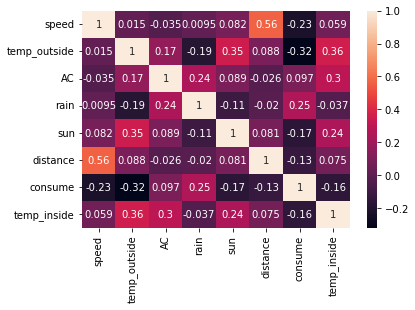

In [22]:
import seaborn as sn
corr = data1_n.corr()
sn.heatmap(corr, annot = True)

In [23]:
#no relevant correlation found between variables

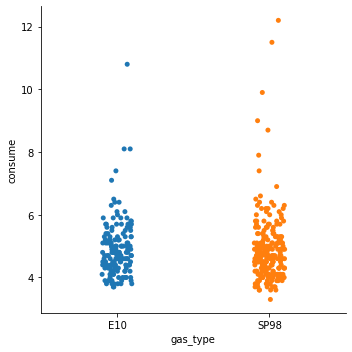

In [24]:
sn.catplot(x="gas_type", y="consume", data=data1)

SP98    228
E10     160
Name: gas_type, dtype: int64


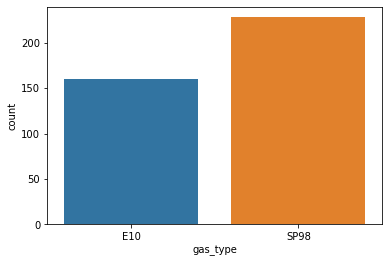

In [25]:
count_classes = data1['gas_type'].value_counts()
print(count_classes)
sn.countplot(x = 'gas_type', data = data1);


In [26]:
#there is no big class imbalance and therefore both types of gas can be compared with this data

In [27]:
#there seems to be littel variation between the consumption and the gas_type

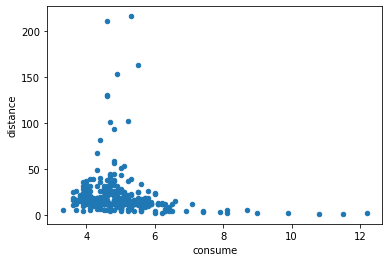

In [28]:
from matplotlib import pyplot as plt

ax2 = data1.plot.scatter(x='consume', y='distance', colormap='viridis')

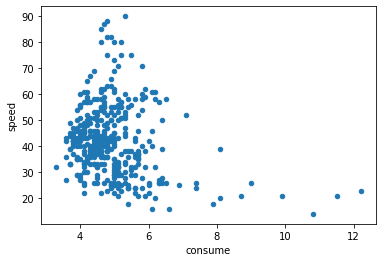

In [29]:
ax2 = data1.plot.scatter(x='consume', y='speed', colormap='viridis')

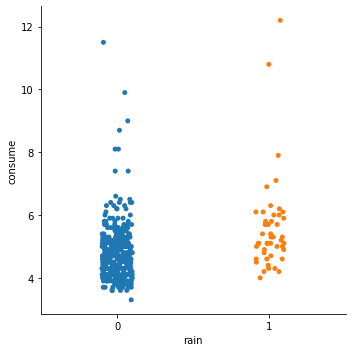

In [30]:
sn.catplot(x="rain", y="consume", data=data1)

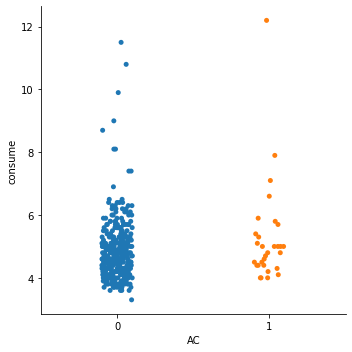

In [31]:
sn.catplot(x="AC", y="consume", data=data1)

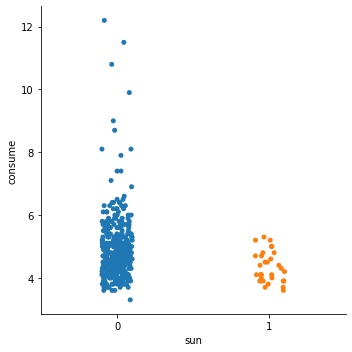

In [32]:
sn.catplot(x="sun", y="consume", data=data1)

In [33]:
#here it does seem like when ther is no sun the car consumes more, however it could also mean that the palce is rarely sunny and therefore most days fall into the no sun category and it is affected by something else

In [34]:
#let's build a prediction model for the consumption

In [36]:
X = data1.drop(['consume'],axis=1)
y =data1['consume']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [38]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.head()

,speed,temp_outside,AC,rain,sun,distance,temp_inside
21,38,1,0,0,0,14.2,21.5
300,54,18,0,0,1,36.5,23.0
181,52,0,1,1,0,12.3,22.5
200,43,13,0,0,0,19.6,21.5
49,36,10,0,0,0,27.3,21.5


In [39]:
categoricals_train = X_train.select_dtypes(object)
categoricals_test = X_test.select_dtypes(object)
categoricals_train.head()

,gas_type
21,E10
300,SP98
181,E10
200,SP98
49,SP98


In [40]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(categoricals_train)


categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
categoricals_test_encoded  = encoder.transform(categoricals_test).toarray()

categoricals_train_encoded = pd.DataFrame(categoricals_train_encoded, columns = encoder.get_feature_names_out()) #adds column names, they werenot present above
categoricals_test_encoded  = pd.DataFrame(categoricals_test_encoded, columns = encoder.get_feature_names_out())
display(categoricals_train_encoded.head())
display(categoricals_test_encoded.head())

,gas_type_SP98
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


,gas_type_SP98
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0


In [41]:
# from sklearn.preprocessing import MinMaxScaler # Sets for each colum the minimum = 0 and the maximum = 1
# MinMaxtransformer = MinMaxScaler()
# MinMaxtransformer.fit(X_num) # fit() Determine the min and the max of each column
# x_normalized = MinMaxtransformer.transform(X_num) # .transform() applies the transformation x_normalized will be np.array
# print("The type of x_normalized is {} and the shape of the array is {}".format(type(x_normalized),x_normalized.shape))
# x_normalized = pd.DataFrame(x_normalized,columns=X_num.columns) # Take the column's names from X_num
# x_normalized.head()

In [42]:
from sklearn.preprocessing import StandardScaler # Sets for each colum the minimum = 0 and the maximum = 1
transformer = StandardScaler()


transformer.fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

In [43]:
# from sklearn.preprocessing import MinMaxScaler # Sets for each colum the minimum = 0 and the maximum = 1
# transformer = MinMaxScaler()


# transformer.fit(numericals_train)
# numericals_train_standardized = transformer.transform(numericals_train)
# numericals_test_standardized = transformer.transform(numericals_test)

In [44]:
X_train = np.concatenate([numericals_train_standardized,categoricals_train_encoded],axis=1)
X_test = np.concatenate([numericals_test_standardized,categoricals_test_encoded],axis=1)

In [45]:
X_train = np.concatenate([numericals_train_standardized,categoricals_train_encoded],axis=1)
X_test = np.concatenate([numericals_test_standardized,categoricals_test_encoded],axis=1)

In [46]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [47]:
from sklearn.metrics import r2_score
y_pred_train = lm.predict(X_train)
r2_score(y_train, y_pred_train)

0.22337527513467192

In [48]:
y_pred_test = lm.predict(X_test)
r2_score(y_test, y_pred_test)

0.14426701027499556

In [ ]:
#the score is bad. It could be improved by testing different models. Which I will do with more time. 
#As far as the relationship between variables there seem to be little to no correlation between the consumption and the other recorded variables. 